In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import Diff_Volatility_Metric as dvm
import Quintile_Portofolio_Sorting as qps
import Portfolio_Return_pred as pr
import Visualizations as vs

%matplotlib inline
plt.style.use('ggplot')

# Load the tickers for the analysis

In [2]:
inp_comp = r'C:\Users\Panagiotis.Mavritsak\Desktop\Reddit sentiment analysis\company data\\'
df_searched = pd.read_csv(inp_comp+'FinalTickers.csv')
# for ticker in df_searched.ticker:
#     print(ticker)
# df_searched.ticker.to_list()

# Load RV-IV


In [3]:
out = r'C:\Users\Panagiotis.Mavritsak\Desktop\Reddit sentiment analysis\Part2\organizedDFs\\'
df_IV = pd.read_excel(out+'OrganizedIV.xlsx')
df_IV['Timestamp'] = df_IV['Timestamp'].dt.date
df_IV.dropna(axis=0, how='all', inplace=True)
df_IV.fillna(method='ffill', inplace=True)
df_IV

,Timestamp,AAL,AAPL,AMD,AMZN,BA,BABA,CCL,CLF,CLNE,...,SPCE,TLRY,UWMC,WISH,WKHS,GME,AMC,BB,TSLA,SPY
0,2021-01-04,0.926473,0.522795,0.636022,0.488536,0.624344,0.627544,0.966829,0.887625,1.504679,...,1.024416,1.426623,1.260107,1.195840,1.263680,1.524441,1.859302,1.066688,0.924766,0.344543
1,2021-01-05,0.884407,0.528512,0.645684,0.508689,0.625677,0.616176,0.930887,0.842723,1.459700,...,1.004039,1.518207,1.251823,1.181646,1.236588,1.477625,1.897314,1.031625,0.884915,0.336254
2,2021-01-06,0.896179,0.566997,0.661918,0.476358,0.644763,0.647478,0.941818,0.846236,1.398013,...,1.031280,1.353291,1.144693,1.184566,1.255874,1.415552,1.939674,1.007799,0.967764,0.347094
3,2021-01-07,0.871511,0.572259,0.675494,0.512092,0.641448,0.661867,0.902893,0.812804,1.393699,...,1.018711,1.378240,1.138178,1.147505,1.267711,1.475236,1.898282,1.076622,0.982219,0.357397
4,2021-01-08,0.838823,0.518607,0.626890,0.492858,0.613232,0.598338,0.857550,0.807379,1.428516,...,0.959481,1.345034,1.082395,1.186934,1.232075,1.409404,1.878697,1.095148,1.029098,0.346151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-12-27,0.747820,0.480326,0.596861,0.387835,0.489905,0.613159,0.744426,0.665625,1.041732,...,1.124471,1.365922,1.071414,1.462322,1.405164,1.321182,1.422869,1.017695,0.840816,0.264018
248,2021-12-28,0.804717,0.479247,0.639770,0.364781,0.503757,0.634991,0.734857,0.680807,1.057490,...,1.115437,1.356397,1.050737,1.436625,1.421589,1.283586,1.406280,1.002350,0.846297,0.267700
249,2021-12-29,0.678809,0.536232,0.628285,0.395707,0.506333,0.647172,0.726035,0.695882,1.130365,...,1.177033,1.367964,1.073710,1.486181,1.409066,1.264782,1.416710,1.059964,0.915785,0.319508
250,2021-12-30,0.700927,0.513566,0.636146,0.394826,0.507325,0.650925,0.754225,0.694616,1.102173,...,1.127068,1.360600,1.036316,1.474607,1.416133,1.241644,1.338756,0.967720,0.846676,0.267809


In [4]:
df_RV = pd.read_excel(out+'RV_10days.xlsx')
df_RV['Timestamp'] = df_RV['Timestamp'].dt.date
df_RV['GME'] = df_RV['GME'].interpolate(method='linear')
df_RV.dropna(axis=0, how='all', inplace=True)
df_RV.fillna(method='bfill', inplace=True)
df_RV.isnull().sum()

Timestamp    0
GME          0
AMC          0
BB           0
TSLA         0
SPY          0
NOK          0
CLOV         0
RKT          0
WISH         0
AAPL         0
AMD          0
SNDL         0
SLV          0
UWMC         0
TLRY         0
MVIS         0
BABA         0
SPCE         0
AMZN         0
CRSR         0
SOFI         0
NVDA         0
CLNE         0
WKHS         0
CLF          0
FB           0
QQQ          0
MSFT         0
RIDE         0
NFLX         0
MNMD         0
SDC          0
COIN         0
ICLN         0
DKNG         0
RBLX         0
GOEV         0
GM           0
LCID         0
INTC         0
DIS          0
MRNA         0
AAL          0
MU           0
GE           0
BA           0
PYPL         0
JPM          0
CCL          0
PFE          0
dtype: int64

# Difference Volatility Metric using norm as metric

In [5]:
df_diff = dvm.clean_diff_timelines(df_RV, df_IV)

df_metric = dvm.apply_metric(df_diff, func=dvm.metric_norm)

df_metric = dvm.apply_running_metric(df_diff, func=dvm.metric_norm)
df_metric

,Timestamp,AAL,AAPL,AMC,AMD,AMZN,BA,BABA,BB,CCL,...,SLV,SNDL,SOFI,SPCE,SPY,TLRY,TSLA,UWMC,WISH,WKHS
0,2021-01-05,0.479738,0.159286,1.613273,0.453362,0.134369,0.252718,0.086239,0.941140,0.364154,...,0.311515,1.197850,NaN,0.499020,0.208826,0.546398,0.642173,0.511475,0.385636,0.232806
1,2021-01-06,0.328689,0.122761,1.138283,0.330218,0.114930,0.142067,0.047373,0.596729,0.264210,...,0.234778,0.904102,NaN,0.317930,0.146918,0.434928,0.446294,0.378417,0.284229,0.165677
2,2021-01-07,0.274504,0.105028,0.912088,0.263476,0.089508,0.114321,0.032180,0.467344,0.229078,...,0.193016,0.730456,NaN,0.263273,0.123408,0.312601,0.381809,0.292618,0.235380,0.144714
3,2021-01-08,0.243005,0.094677,0.768425,0.209429,0.095216,0.097208,0.024172,0.388376,0.208727,...,0.164475,0.628658,NaN,0.253622,0.107256,0.261166,0.321563,0.274421,0.204041,0.112381
4,2021-01-11,0.216821,0.081534,0.665644,0.174059,0.092699,0.083434,0.019343,0.330504,0.187707,...,0.131910,0.567104,NaN,0.234746,0.095400,0.228983,0.283609,0.252513,0.193318,0.091207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2021-12-27,0.021881,0.014920,0.106544,0.014240,0.012810,0.014182,0.013940,0.044703,0.020169,...,0.016108,0.066513,NaN,0.028452,0.011358,0.051954,0.025732,0.035383,0.041440,0.047525
247,2021-12-28,0.021859,0.014902,0.106180,0.014185,0.012776,0.014125,0.013902,0.044585,0.020097,...,0.016118,0.066345,NaN,0.028434,0.011318,0.051812,0.025639,0.035357,0.041281,0.047375
248,2021-12-29,0.021868,0.014882,0.105819,0.014137,0.012741,0.014072,0.013849,0.044474,0.020027,...,0.016113,0.066169,NaN,0.028429,0.011280,0.051677,0.025549,0.035329,0.041127,0.047247
249,2021-12-30,0.021816,0.014886,0.105466,0.014083,0.012716,0.014022,0.013794,0.044376,0.019961,...,0.016114,0.066009,NaN,0.028430,0.011255,0.051557,0.025477,0.035319,0.040986,0.047117


# Quantile portfolio sorting

In [6]:
return_data_path = r'C:\Users\Panagiotis.Mavritsak\Desktop\Reddit sentiment analysis\Part2\part 2 data\\'

return_data = pd.read_csv(return_data_path+'Return_data.csv')
return_data.rename(columns={'Date': 'Timestamp'}, inplace=True)
return_data = return_data.iloc[-1:].reset_index(drop=True)
return_data.drop(columns=['Timestamp'], axis=1, inplace=True)

df_diff = dvm.clean_diff_timelines(df_RV, df_IV)

df_metric = dvm.apply_metric(df_diff, func=dvm.metric_norm)

df_port_sort = qps.sort_portfolio_quintiles(df_metric, n_port=10)  # df metric per ticker and number of portfolios

df_merge = pd.concat([df_port_sort, return_data], axis=0).T
df_merge.columns = ['Portfolio', 'Return']
df_port_returns = df_merge.groupby(by=['Portfolio']).mean()
df_port_returns

,Return
Portfolio,
1.0,-0.052361
2.0,-0.050773
3.0,-0.049053
4.0,-0.031420
5.0,-0.034765
6.0,-0.047306
7.0,-0.048485
8.0,-0.046950
9.0,-0.037055


# Get portfolio running returns

In [7]:
return_data = pd.read_csv(return_data_path+'Return_data.csv')
return_data.rename(columns={'Date': 'Timestamp'}, inplace=True)
return_data['Timestamp'] = pd.to_datetime(return_data['Timestamp']).dt.date
# return_data = return_data.iloc[-1:].reset_index(drop=True)
# return_data.drop(columns=['Timestamp'], axis=1, inplace=True)

df_diff = dvm.clean_diff_timelines(df_RV, df_IV)
df_metric = dvm.apply_running_metric(df_diff, func=dvm.metric_norm)

n_port = 10  #  set number of portfolios
df_port_sort = qps.sort_running_portfolio_quintiles(metric=copy.deepcopy(df_metric), n_port=n_port)
df_port_returns = qps.portfolio_running_returns(df_port=copy.deepcopy(df_port_sort), df_returns=copy.deepcopy(return_data))
df_port_returns

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:39: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


,Timestamp,1,2,3,4,5,6,7,8,9,10
0,2021-01-05,0.018358,-0.005318,0.013926,0.031497,0.029383,0.018551,0.009290,0.039973,0.035567,0.018143
1,2021-01-06,0.009307,-0.018264,-0.020151,0.054355,0.002521,-0.018264,0.010126,0.001632,0.064188,0.013166
2,2021-01-07,0.011051,0.021547,0.014059,0.068912,0.023223,0.016995,0.043007,0.053833,0.047227,0.060905
3,2021-01-08,-0.003334,0.001961,-0.008355,0.009883,-0.020815,0.012868,-0.021822,0.010160,0.004318,0.018032
4,2021-01-11,-0.006621,-0.006745,-0.010739,0.026862,0.000366,0.013115,-0.023418,0.011816,0.065920,0.010883
...,...,...,...,...,...,...,...,...,...,...,...
246,2021-12-27,0.009052,0.023152,0.008834,0.007752,-0.007901,-0.005705,-0.009921,-0.037529,-0.021862,-0.025608
247,2021-12-28,-0.003810,-0.011529,-0.004469,0.002504,-0.011554,0.000743,-0.020602,-0.031578,-0.033753,-0.036285
248,2021-12-29,0.005750,-0.006376,-0.013545,-0.002420,-0.001931,-0.015088,-0.036143,-0.045253,-0.045843,-0.009679
249,2021-12-30,-0.008154,0.004987,0.015038,0.002638,0.024116,0.002856,0.031056,0.024966,0.027554,0.021822


In [ ]:
vs.plots(df_RV, name='RV')

In [ ]:
vs.plots(df_IV, name='IV')

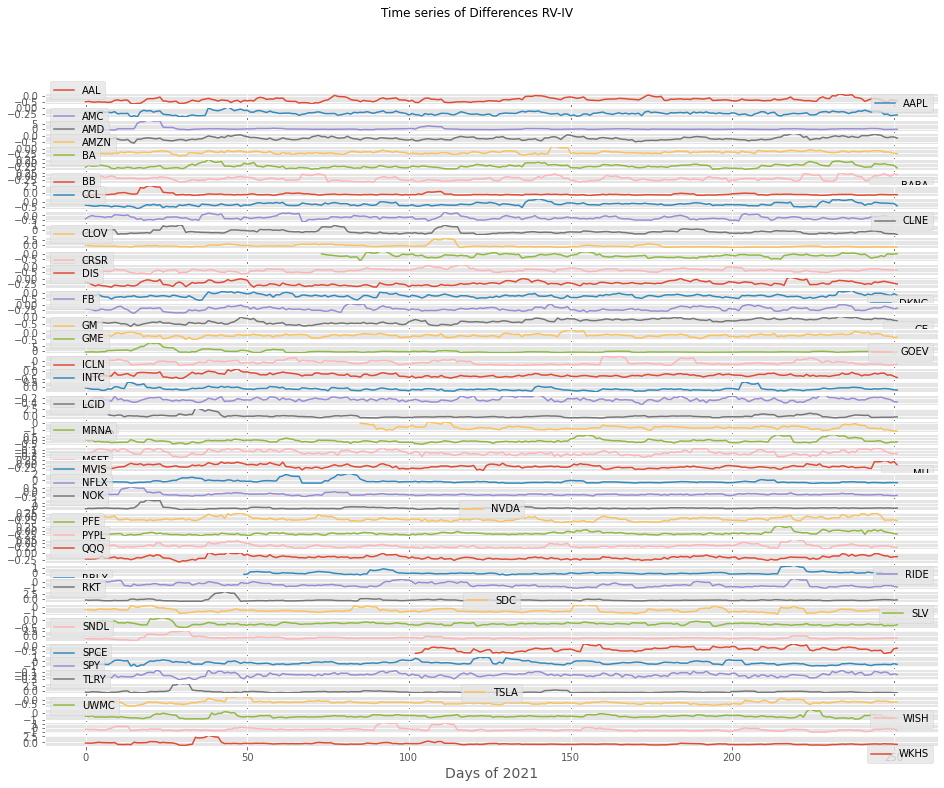

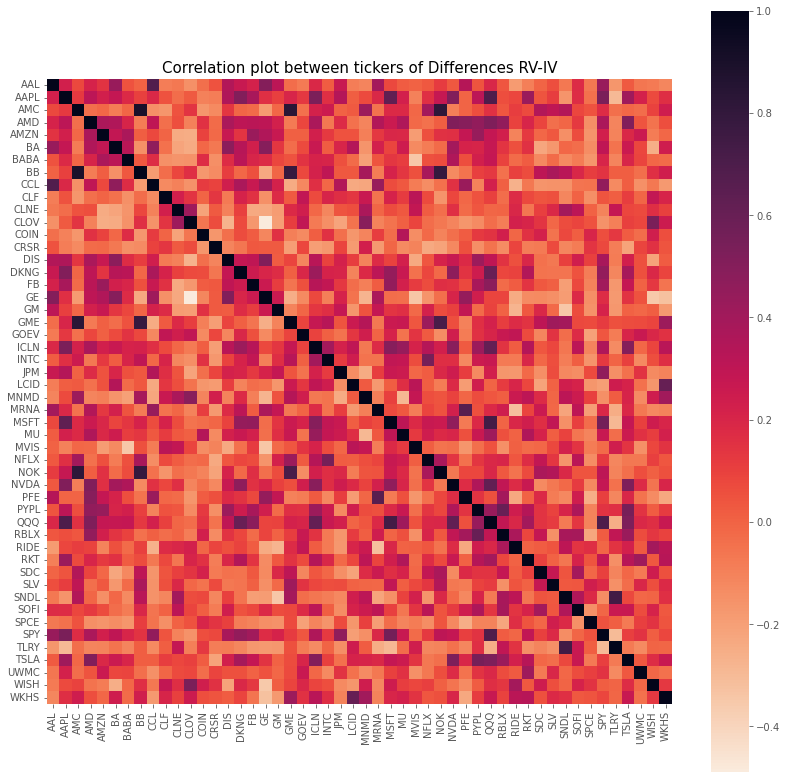

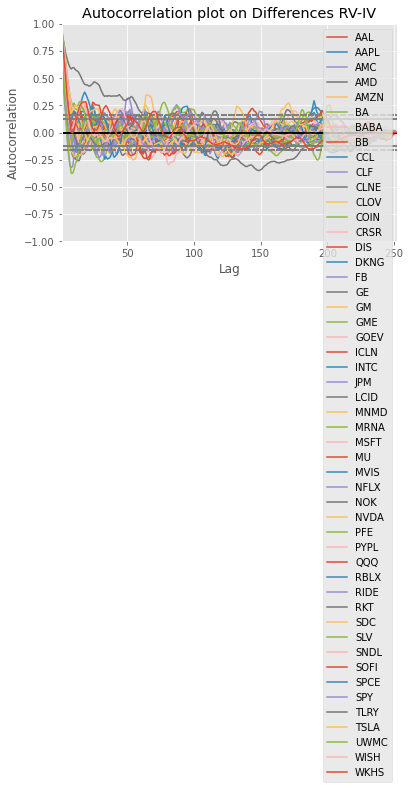

In [8]:
vs.plots(df_diff)

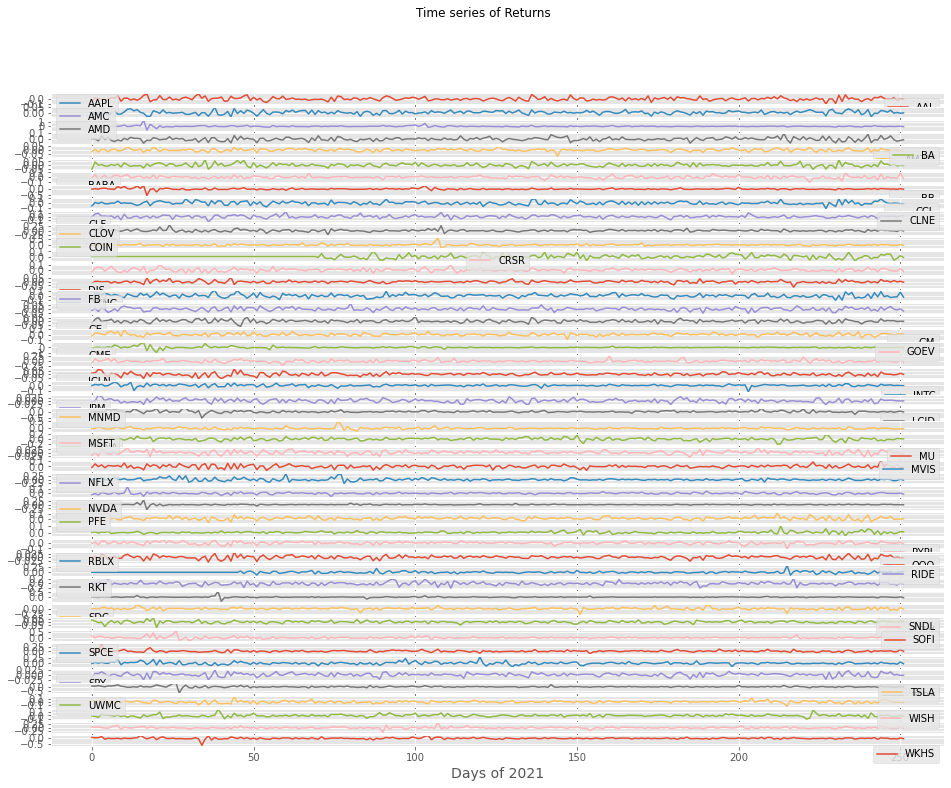

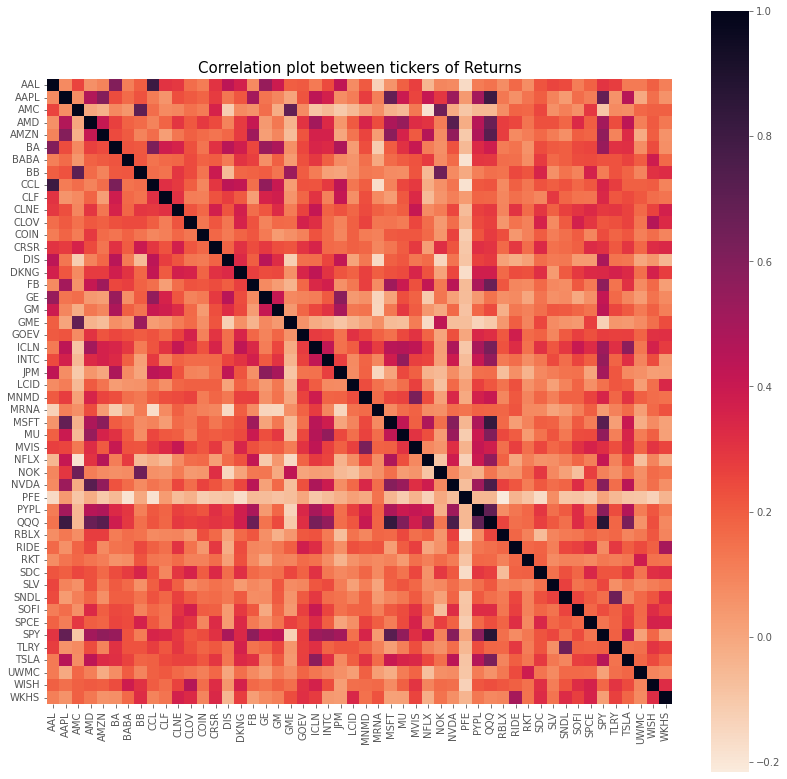

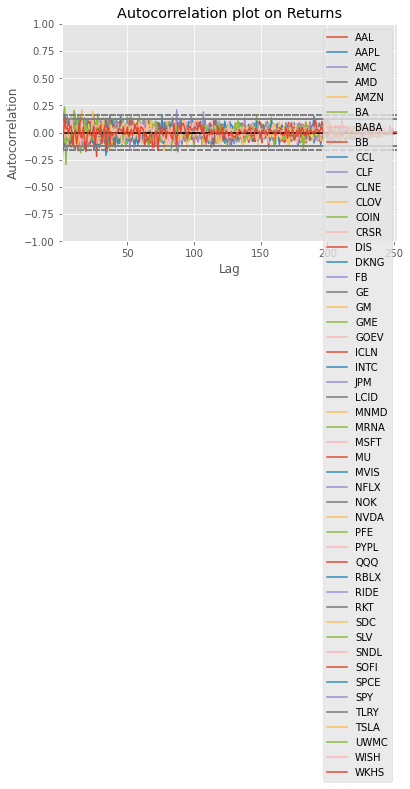

In [11]:
return_data = return_data[ return_data.Timestamp.isin(df_diff.Timestamp)]
return_data.reset_index(inplace=True)
return_data.drop('index', axis=1, inplace=True)
vs.plots(return_data, name='Returns')  # to limit only for 2021

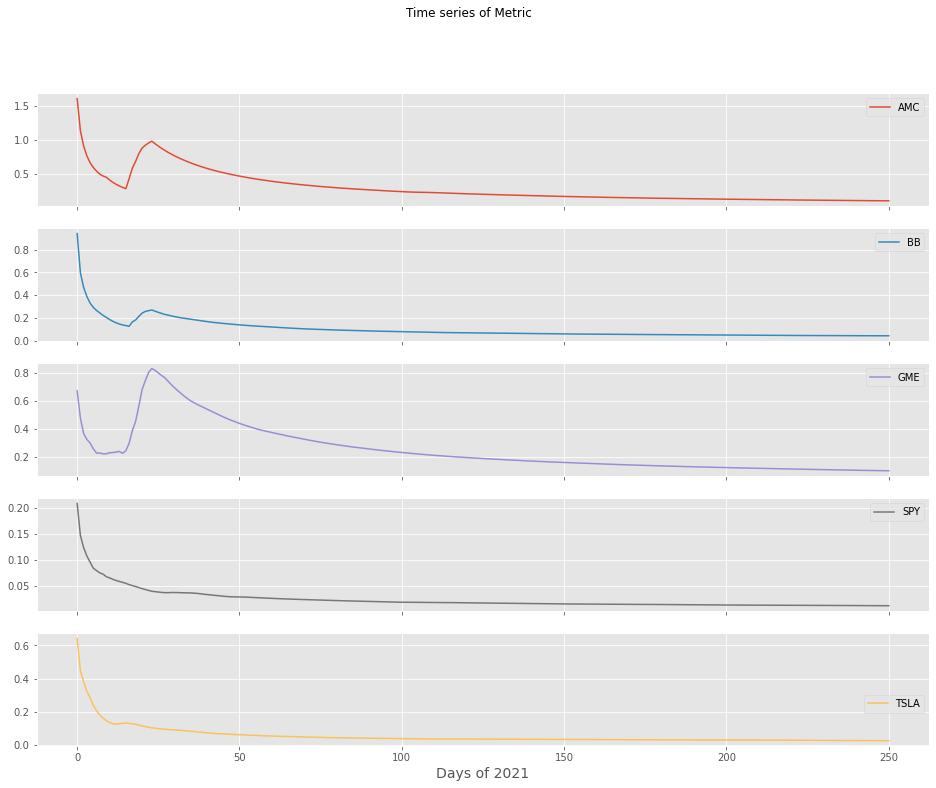

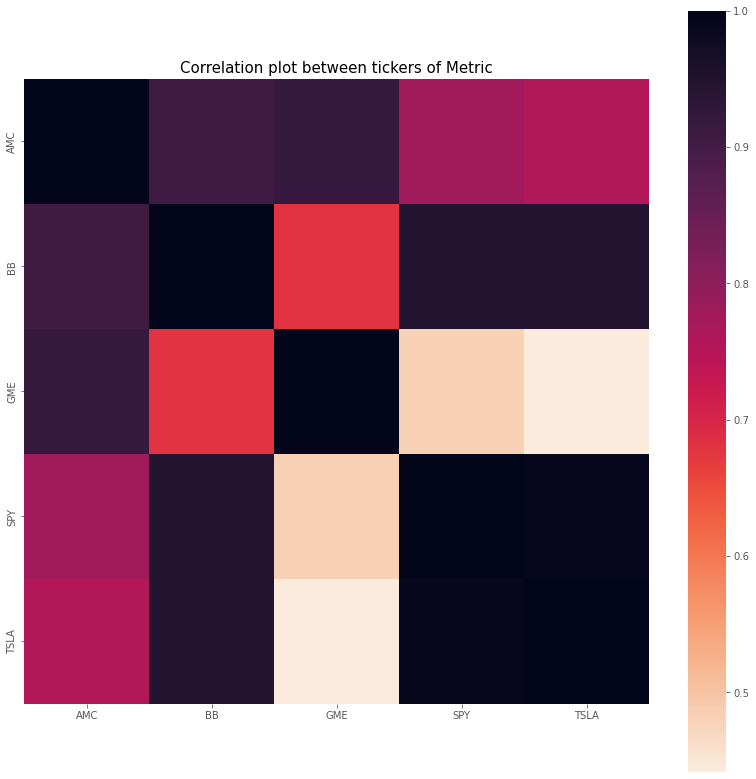

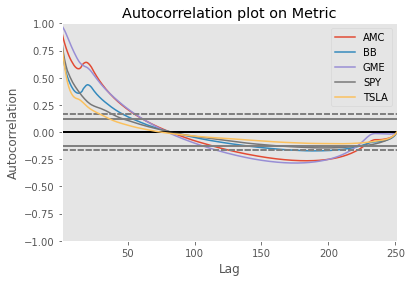

In [12]:
vs.plots(df_metric, name='Metric')

# Test main scope:
### Does great difference lead to great return?

In [9]:
return_data = return_data[ return_data.Timestamp.isin(df_diff.Timestamp)]
return_data.reset_index(inplace=True)
return_data.drop('index', axis=1, inplace=True)
# return_data

C:\Users\Panagiotis.Mavritsak\Desktop\Reddit sentiment analysis\Part2\Visualizations.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(2)


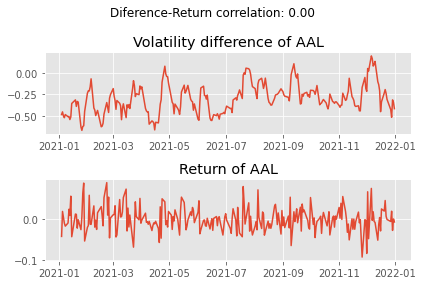

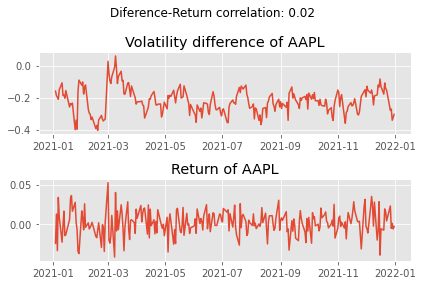

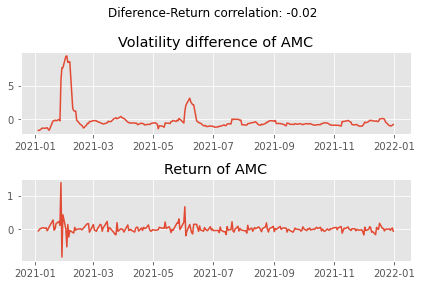

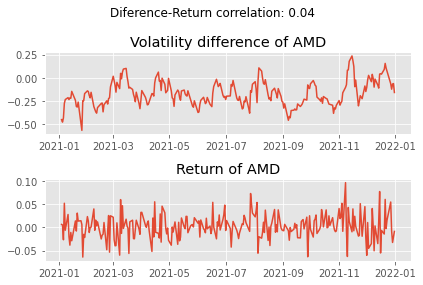

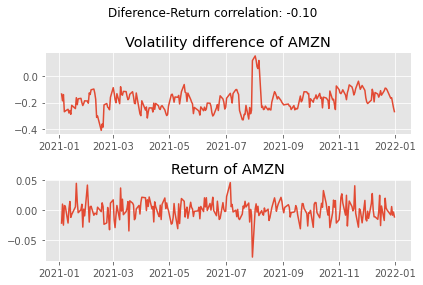

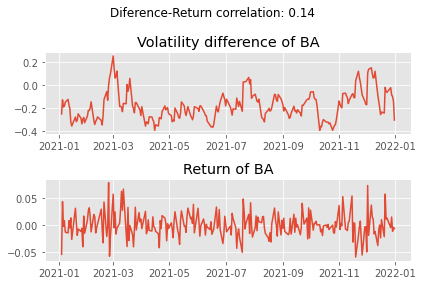

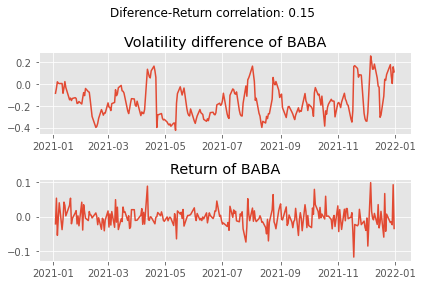

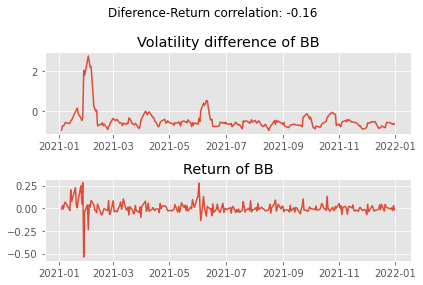

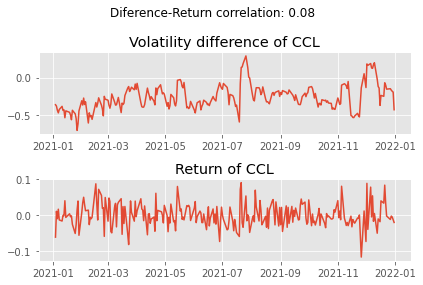

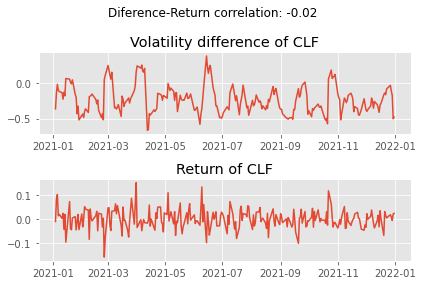

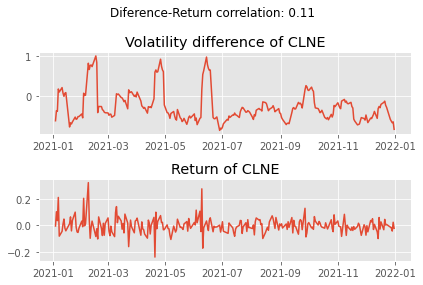

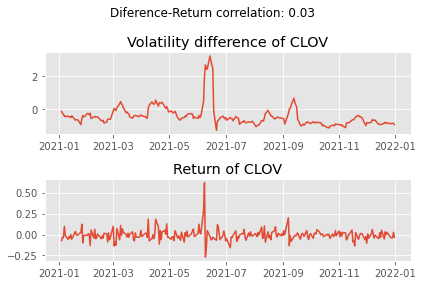

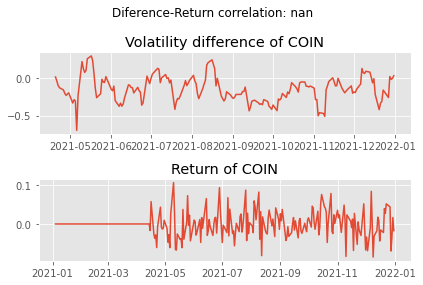

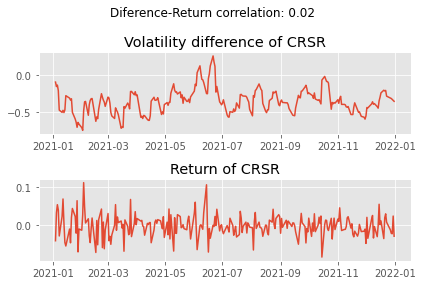

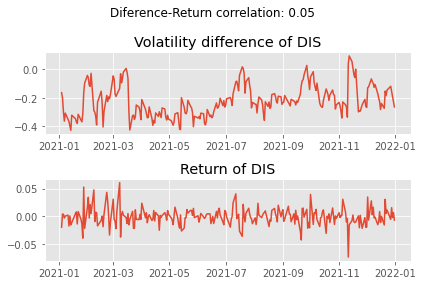

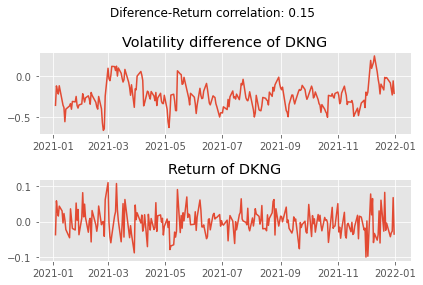

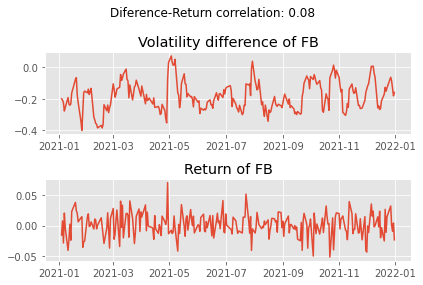

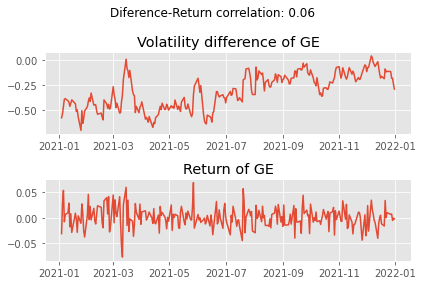

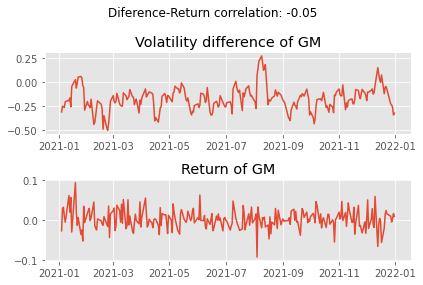

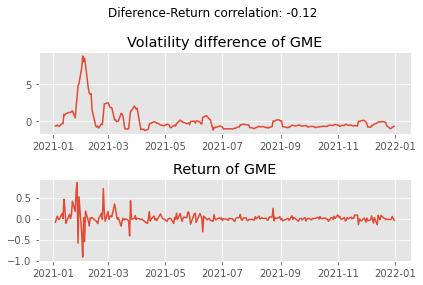

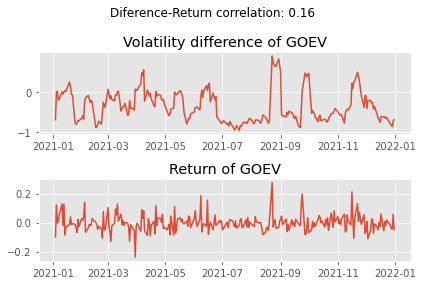

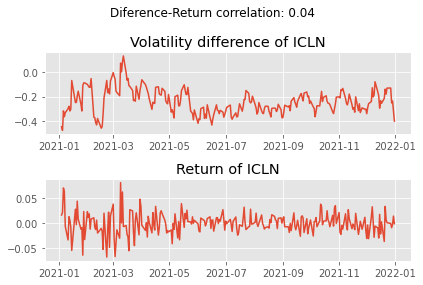

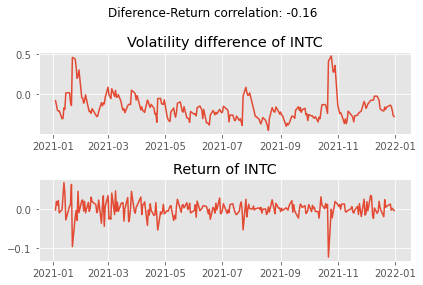

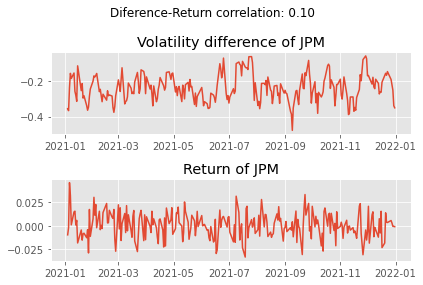

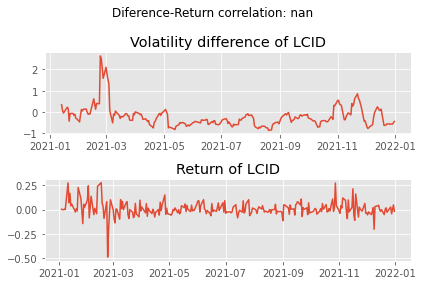

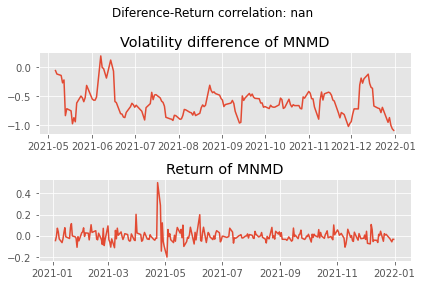

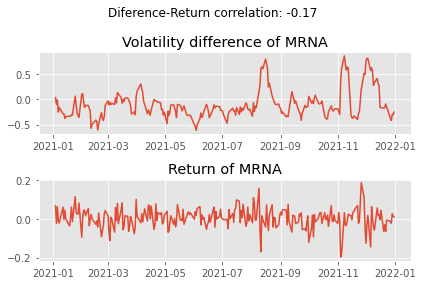

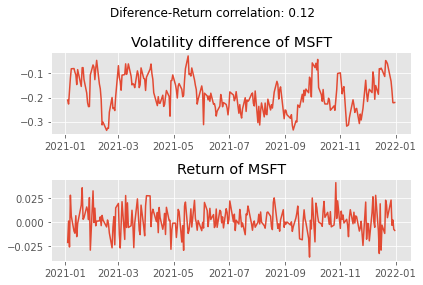

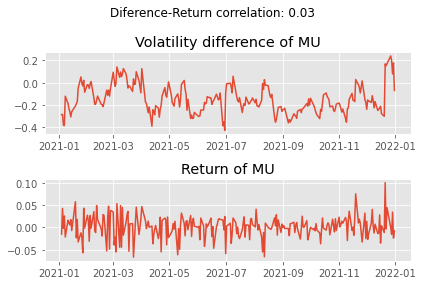

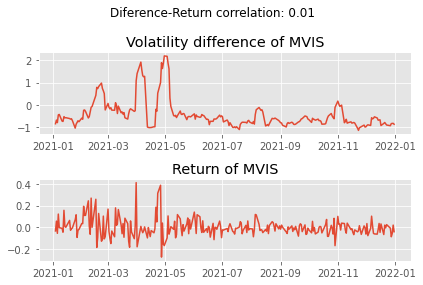

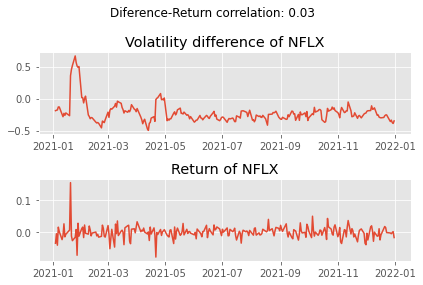

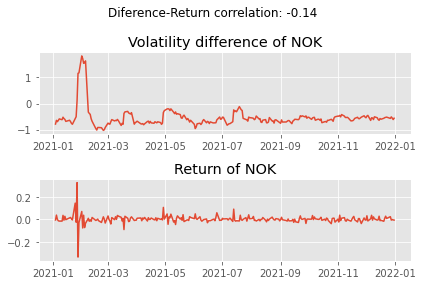

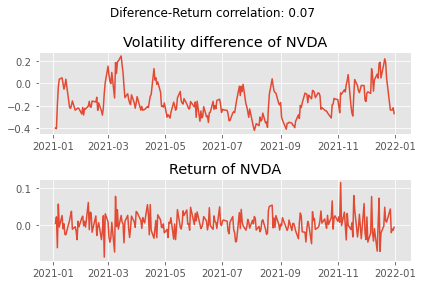

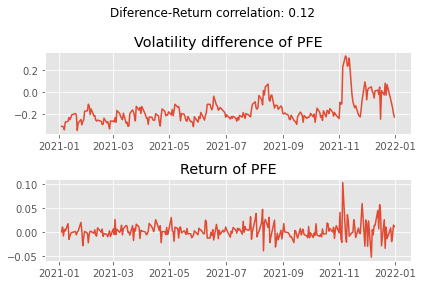

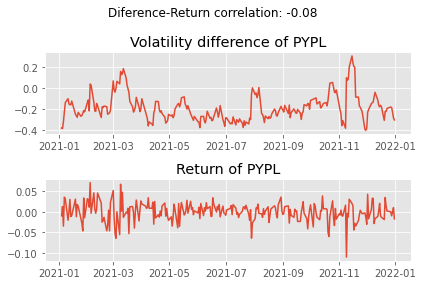

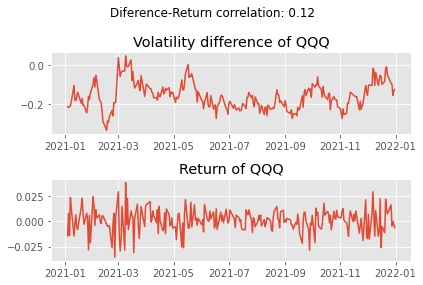

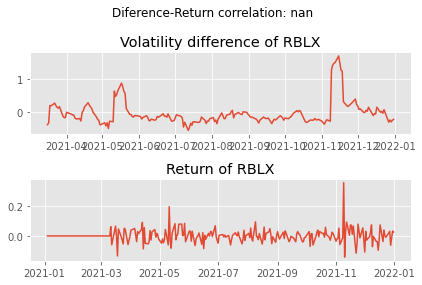

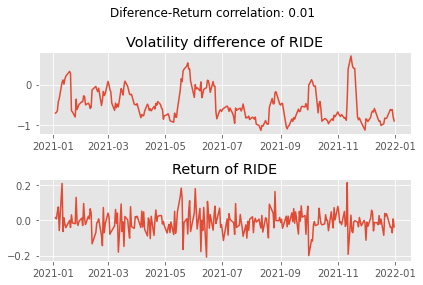

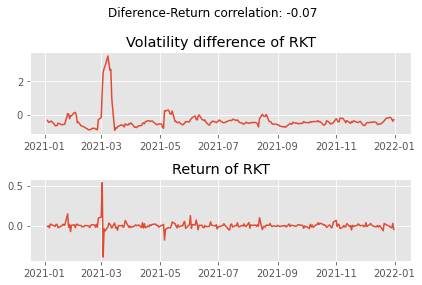

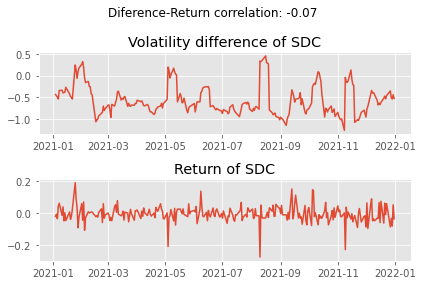

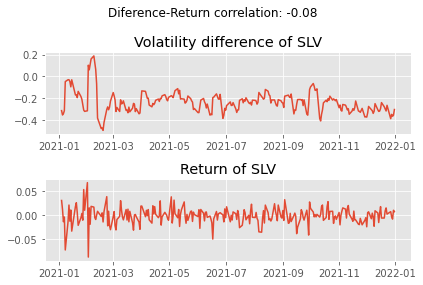

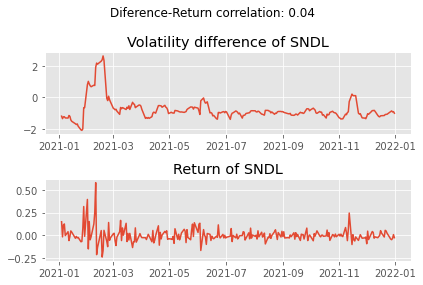

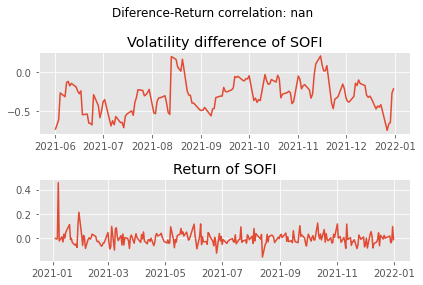

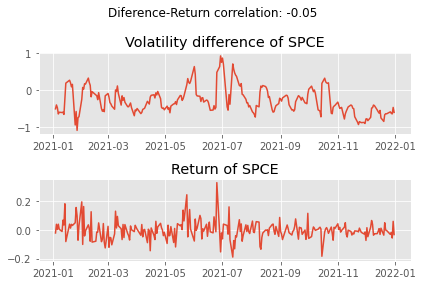

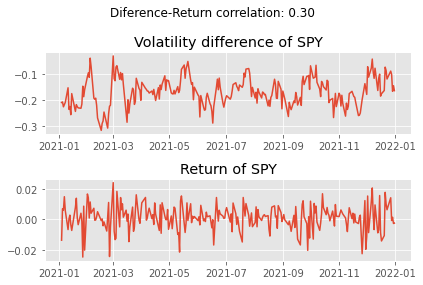

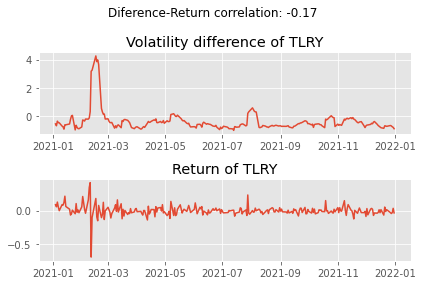

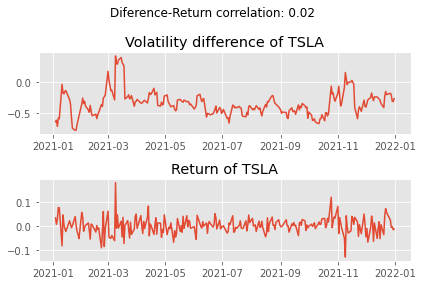

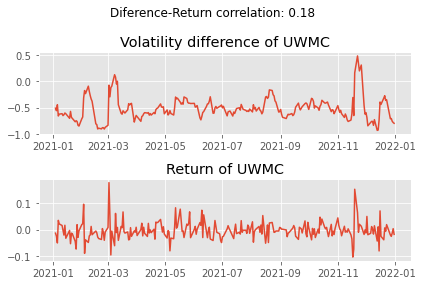

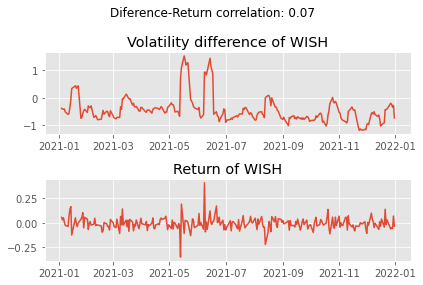

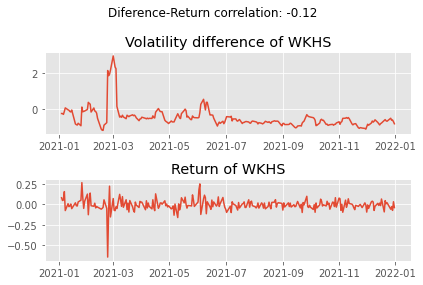

In [10]:
vs.diff_return_plots(df_diff, return_data)